In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_frame=pd.read_csv("churn_prediction.csv")

In [3]:
data_frame.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
data_frame.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [5]:
data_frame.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
data_frame["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

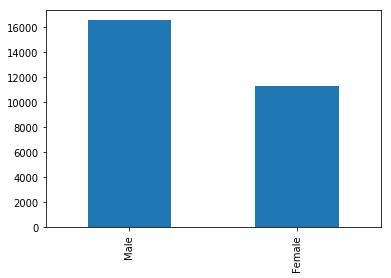

In [7]:
data_frame["gender"].value_counts().plot(kind='bar')

In [8]:
data_frame["gender"].fillna('Male',inplace=True)

In [9]:
groups=['teen','student','youth','adult','middle','old']
values=[0,10,20,30,45,60,100]
data_frame['age_group']=pd.cut(data_frame['age'],values,labels=groups)

In [10]:
val=data_frame.pivot_table(values=['dependents'],index='age_group',aggfunc='mean')

In [11]:
for i in range(0,len(data_frame)):
    if pd.isnull(data_frame['dependents'][i])==True:
        if data_frame['age_group'][i]=='teen' or data_frame['age_group'][i]=='student':
            data_frame['dependents']=0.0
        if data_frame['age_group'][i]=='youth' or data_frame['age_group'][i]=='adult':
            data_frame['dependents']=1.0
        if data_frame['age_group'][i]=='middle' or data_frame['age_group'][i]=='old':
            data_frame['dependents']=2.0

In [12]:
data_frame['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [13]:
data_frame.pivot_table(values='age',index='occupation',aggfunc='mean')

,age
occupation,
company,69.825000
retired,72.173419
salaried,44.077416
self_employed,50.303902
student,19.408649


In [14]:
for i in range(0,len(data_frame)):
    if pd.isnull(data_frame['occupation'][i])==True:
        if data_frame['age'][i]<=20:
            data_frame['occupation'][i]='student'
        elif data_frame['age'][i]>20 and data_frame['age'][i]<=45:
            data_frame['occupation'][i]='salaried'
        elif data_frame['age'][i]>45 and data_frame['age'][i]<=50:
            data_frame['occupation'][i]='self_employed'
        elif data_frame['age'][i]>50 and data_frame['age'][i]<=69:
            data_frame['occupation'][i]='company'
        elif data_frame['age'][i]>69:
            data_frame['occupation'][i]='retired'
        

C:\Users\AVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\AVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\AVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AVM\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWith

In [15]:
data_frame['occupation'].isnull().sum()

0

In [18]:
data_frame['city'].fillna(data_frame['city'].mode()[0],inplace=True)

In [19]:
data_frame['days_since_last_transaction'].fillna(data_frame['days_since_last_transaction'].value_counts().mode()[0],inplace=True)

In [20]:
data_frame.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
age_group                         0
dtype: int64

In [22]:
data_frame.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                                int64
age_group                         category
dtype: object

In [24]:
data_frame.astype({'age_group':'object'})

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,age_group
0,1,3135,66,Male,2.0,self_employed,187.0,2,755,224.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,old
1,2,310,35,Male,2.0,self_employed,1020.0,2,3214,60.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,adult
2,4,2356,31,Male,2.0,salaried,146.0,2,41,20.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,adult
3,5,478,90,Male,2.0,self_employed,1020.0,2,582,147.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,old
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,adult
5,7,263,42,Female,2.0,self_employed,1096.0,2,1666,60.0,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,adult
6,8,5922,72,Male,2.0,retired,1020.0,1,1,98.0,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,old
7,9,1145,46,Male,2.0,self_employed,623.0,2,317,172.0,...,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,middle
8,10,2132,31,Male,2.0,salaried,1096.0,2,4110,19.0,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,adult
9,11,3379,40,Male,2.0,self_employed,1020.0,2,38,0.0,...,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0,adult


In [25]:
data_frame.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.0,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,2.0,802.444014,2.225530,925.975019,64.320168,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.0,428.316238,0.660443,937.799129,82.824204,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,2.0,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,2.0,409.000000,2.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,2.0,879.000000,2.000000,572.000000,24.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,2.0,1096.000000,3.000000,1440.000000,83.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,2.0,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [44]:
indep_var=data_frame.drop(['age','churn'],axis=1)

In [45]:
dep_var=data_frame['churn']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train_x,test_x,train_y,test_y=train_test_split(indep_var,dep_var,stratify=dep_var,random_state=42)

In [52]:
train_y.value_counts()/len(train_y)

0    0.814667
1    0.185333
Name: churn, dtype: float64

In [53]:
test_y.value_counts()/len(test_y)

0    0.814684
1    0.185316
Name: churn, dtype: float64

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
model=RandomForestClassifier(n_estimators=35)

In [120]:
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [121]:
model.score(train_x,train_y)

0.9989194775909048

In [122]:
model.score(test_x,test_y)

0.8623167981961668

In [104]:
model.feature_importances_

array([4.32363758e-02, 4.74715841e-02, 0.00000000e+00, 3.61214807e-02,
       1.07231784e-02, 4.40289043e-02, 3.93441855e-02, 1.70727189e-01,
       6.22226761e-02, 5.99297395e-02, 6.04148521e-02, 4.50038111e-02,
       4.36387863e-02, 8.38738511e-02, 5.34334420e-02, 9.17441815e-02,
       5.75139869e-02, 5.75472983e-03, 5.85721918e-03, 7.33037644e-05,
       2.40482482e-03, 4.78068211e-03, 5.47540417e-03, 2.76026518e-03,
       9.75385257e-04, 1.62425066e-03, 3.87083912e-03, 5.98578030e-03,
       5.35828101e-03, 5.65080970e-03])